In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
for i in df.columns:
    print(i)

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [7]:
df.shape

(301, 9)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df["Age"] = 2020-df["Year"]
df.drop("Year",axis=1,inplace=True) 

Univariate analysis:

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

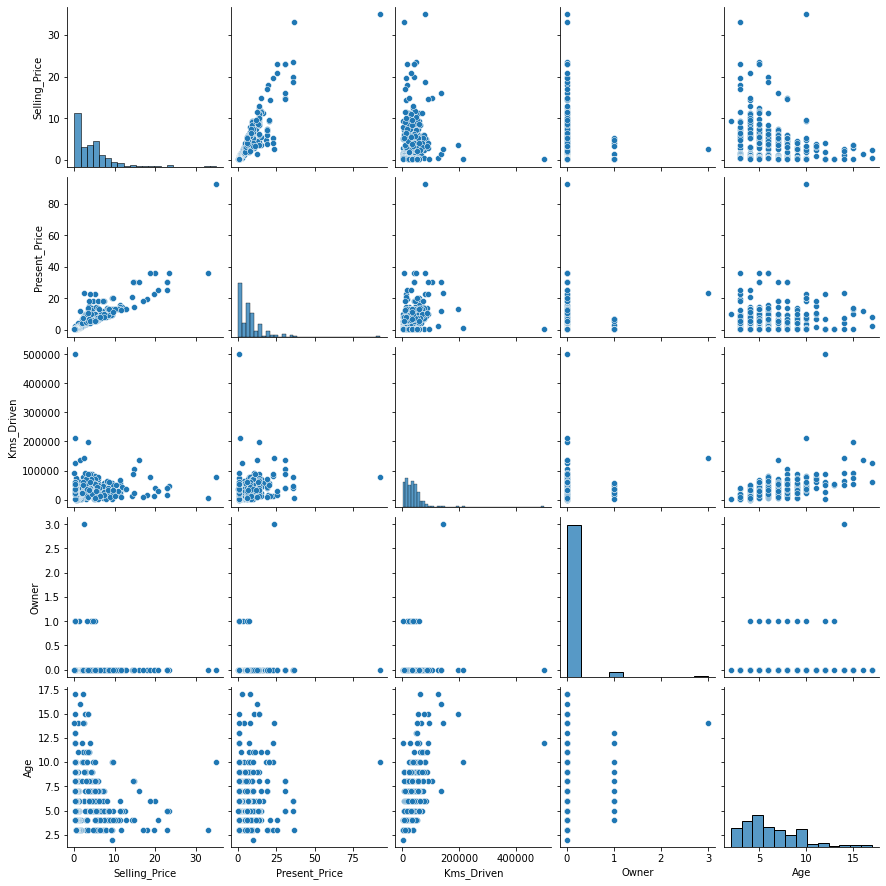

In [11]:
sns.pairplot(df)

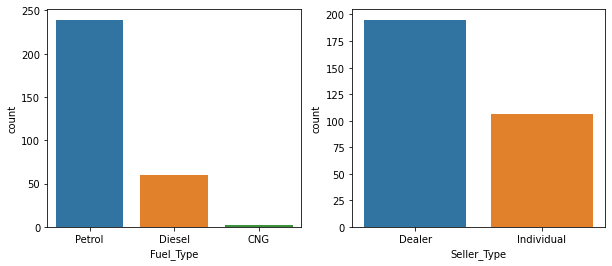

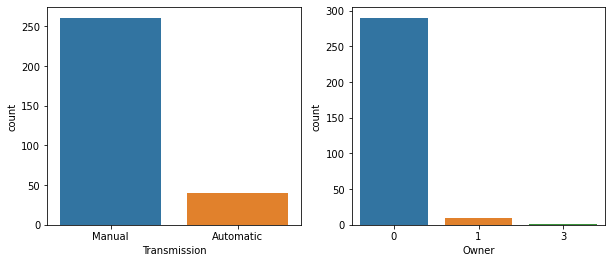

In [12]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
        
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
     
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

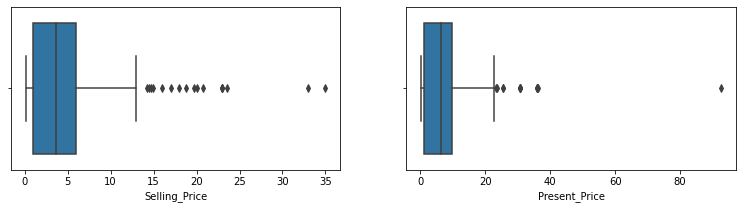

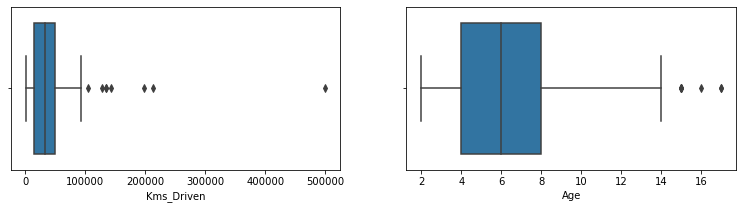

In [13]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [14]:
df[df['Present_Price'] > df['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [15]:
df[df['Selling_Price'] > df['Selling_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [16]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12



Bivariate/Multi-Variate Analysis:

<AxesSubplot:>

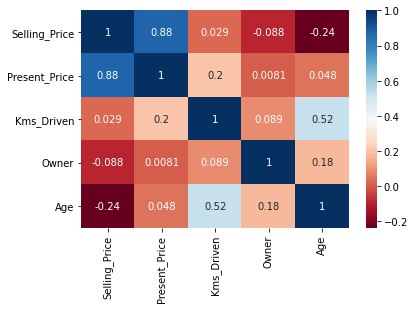

In [17]:
sns.heatmap(data=df.corr(),annot=True,cmap="RdBu")

#Data Preparation:

In [18]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
#converting categorical values to one-hot encoding
df = pd.get_dummies(data = df,drop_first=True) 

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


#Performing train test split:

In [22]:
#independent and dependent variable
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
X.shape

(301, 8)

In [24]:
y.shape

(301,)

In [25]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.3843247  0.0415175  0.00048967 0.07904583 0.2164407  0.01443938
 0.12962706 0.13411516]


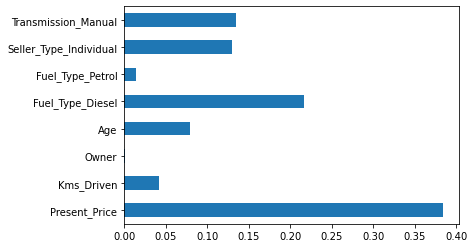

In [29]:
#ploting for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


Model Creation/Evaluation:

In [32]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [33]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


C:\Users\Guttu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


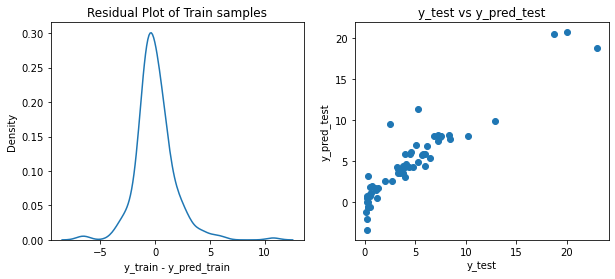

In [34]:
# Standard Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [35]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()

alpha = np.logspace(-3,3,num=14)

rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912009 0.89839451 0.82980292 0.81769155 0.71854676]
Train CV mean : 0.83


C:\Users\Guttu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


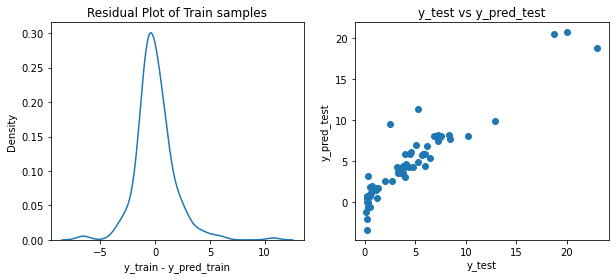

In [36]:
car_pred_model(rg_rs,"ridge.pkl")

In [37]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990973  0.89975361 0.8301628  0.81769086 0.70210321]
Train CV mean : 0.83


C:\Users\Guttu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


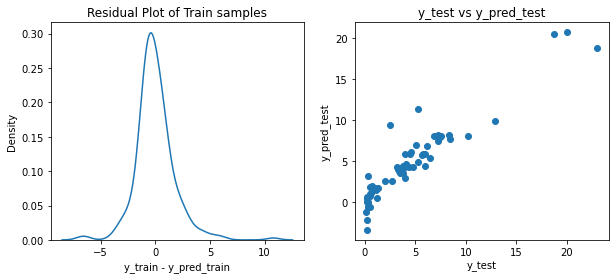

In [38]:
car_pred_model(ls_rs,"lasso.pkl")

In [39]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators=list(range(500,1000,100))

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

max_features=['auto','sqrt']

param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,verbose= 2,n_jobs= 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END max_depth=30, m

[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=15

C:\Users\Guttu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


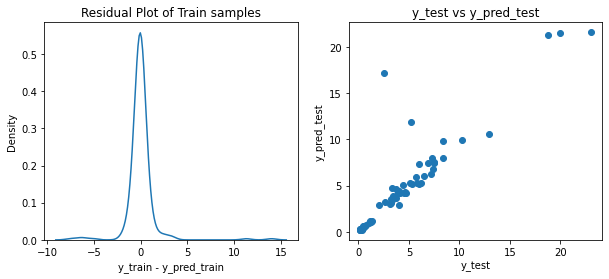

In [40]:
car_pred_model(rf_rs,'random_forest.pkl')

In [41]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=800)


In [42]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']


param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.78
Train CV scores : [0.93665608 0.93312685 0.86027772 0.92618784 0.78785364]
Train CV mean : 0.89


C:\Users\Guttu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


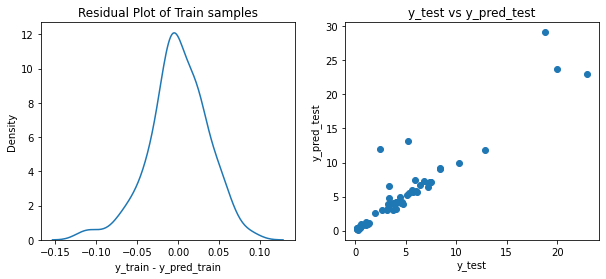

In [43]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [44]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.83
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.91,0.78,0.89
4,GradientBoostingRegressor,1.00,0.78,0.89


In [45]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_rs, file)